In [16]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [17]:
df=pd.read_csv('COVID19_tests.csv')
df.head()
df.tail()

,Country,Date,Tested,Units,Positive,Positive/Tested %,Source_1,Source_2,FileDate
1716,United States: Michigan,30-Mar,17379.0,NaN,5486.0,31.57,https://covidtracking.com/data/state/michigan/,,31Mar2020
1717,United States: Texas,30-Mar,35880.0,NaN,2877.0,8.02,https://txdshs.maps.arcgis.com/apps/opsdashboa...,,31Mar2020
1718,United States: Washington,29-Mar,65462.0,NaN,4896.0,7.48,https://www.doh.wa.gov/Emergencies/Coronavirus,,31Mar2020
1719,Uruguay,24-Mar,1538.0,NaN,189.0,12.29,https://www.montevideo.com.uy/Noticias/Gobiern...,,31Mar2020
1720,Vietnam,31-Mar,35808.0,NaN,207.0,0.58,https://ncov.moh.gov.vn/,,31Mar2020


In [18]:
df['Units'].value_counts()

Units
cases      586
samples    293
Name: count, dtype: int64

In [19]:
df.shape

(1721, 9)

In [20]:
df.isnull().sum()

Country                0
Date                   0
Tested                 2
Units                842
Positive               5
Positive/Tested %      7
Source_1               0
Source_2               0
FileDate             352
dtype: int64

In [21]:
df['Positive']=df['Positive'].fillna(df['Positive'].mean())

In [22]:
df['Positive/Tested %']=df['Positive/Tested %'].fillna(df['Positive/Tested %'].mean())

In [23]:
df['Tested']=df["Tested"].fillna(df['Tested'].mean())

In [24]:
df['Units']=df['Units'].fillna(df['Units'].mode()[0])

In [25]:
df.head(20)

,Country,Date,Tested,Units,Positive,Positive/Tested %,Source_1,Source_2,FileDate
0,Afghanistan,31 May,38460.0,samples,15205.0,39.50,https://moph-dw.gov.af/dhis-web-dashboard/#/,,13-July-2020
1,Albania,9 June,16716.0,samples,1299.0,7.80,https://new.shëndetësia.gov.al/9-qershor-2020-...,,13-July-2020
2,Algeria,20 June,22467.0,samples,11631.0,51.80,https://africacdc.org/covid-19/,,13-July-2020
3,Argentina,28 June,329036.0,samples,55343.0,17.10,https://www.argentina.gob.ar/coronavirus/infor...,,13-July-2020
4,Armenia,24 May,50397.0,cases,6661.0,13.20,https://ncdc.am/coronavirus/confirmed-cases-by...,,13-July-2020
5,Australia,12 July,3075488.0,samples,9796.0,0.32,https://www.health.gov.au/news/health-alerts/n...,,13-July-2020
6,Austria,11 July,691709.0,cases,18704.0,2.70,https://www.sozialministerium.at/Informationen...,,13-July-2020
7,Azerbaijan,31 May,298648.0,cases,5494.0,1.80,https://koronavirusinfo.az/az/page/statistika/...,,13-July-2020
8,Bahrain,21 June,477788.0,cases,21764.0,4.60,https://www.moh.gov.bh/COVID19,,13-July-2020
9,Bangladesh,2 July,805697.0,samples,153277.0,19.00,https://www.iedcr.gov.bd,,13-July-2020


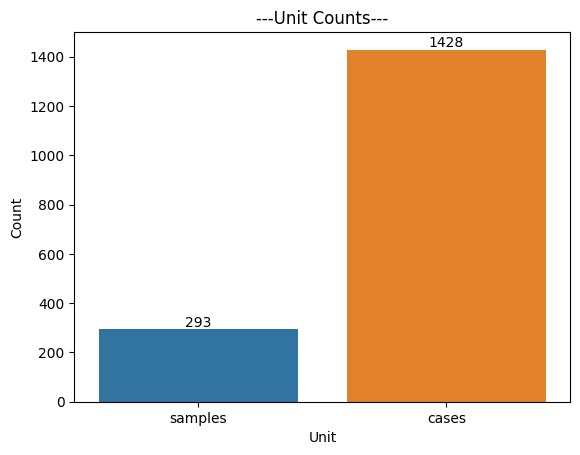

In [29]:
graph=sns.countplot(x='Units',data=df,hue='Units')
plt.title('---Unit Counts---')
plt.xlabel("Unit")
plt.ylabel('Count')

for container in graph.containers:
    graph.bar_label(container)

plt.show()


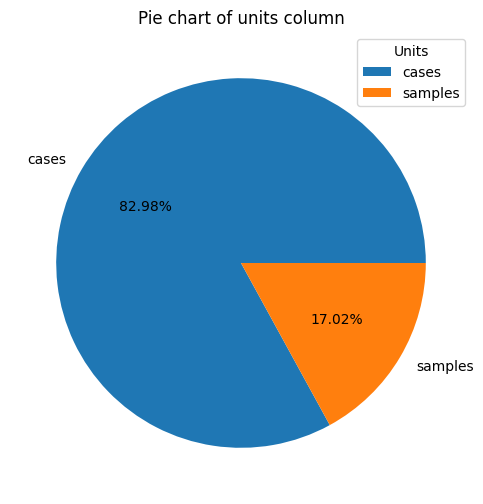

In [30]:
category_counts=df["Units"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(category_counts,labels=category_counts.index,autopct="%.2f%%")
plt.title("Pie chart of units column")
plt.legend(labels=category_counts.index,title='Units',loc='upper right')
plt.show()

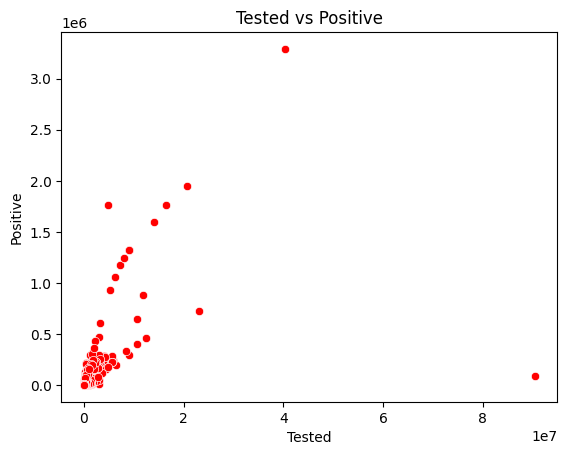

In [31]:
sns.scatterplot(data=df,x='Tested',y='Positive',color="red")

plt.title('Tested vs Positive')
plt.xlabel('Tested')
plt.ylabel('Positive')
plt.show()

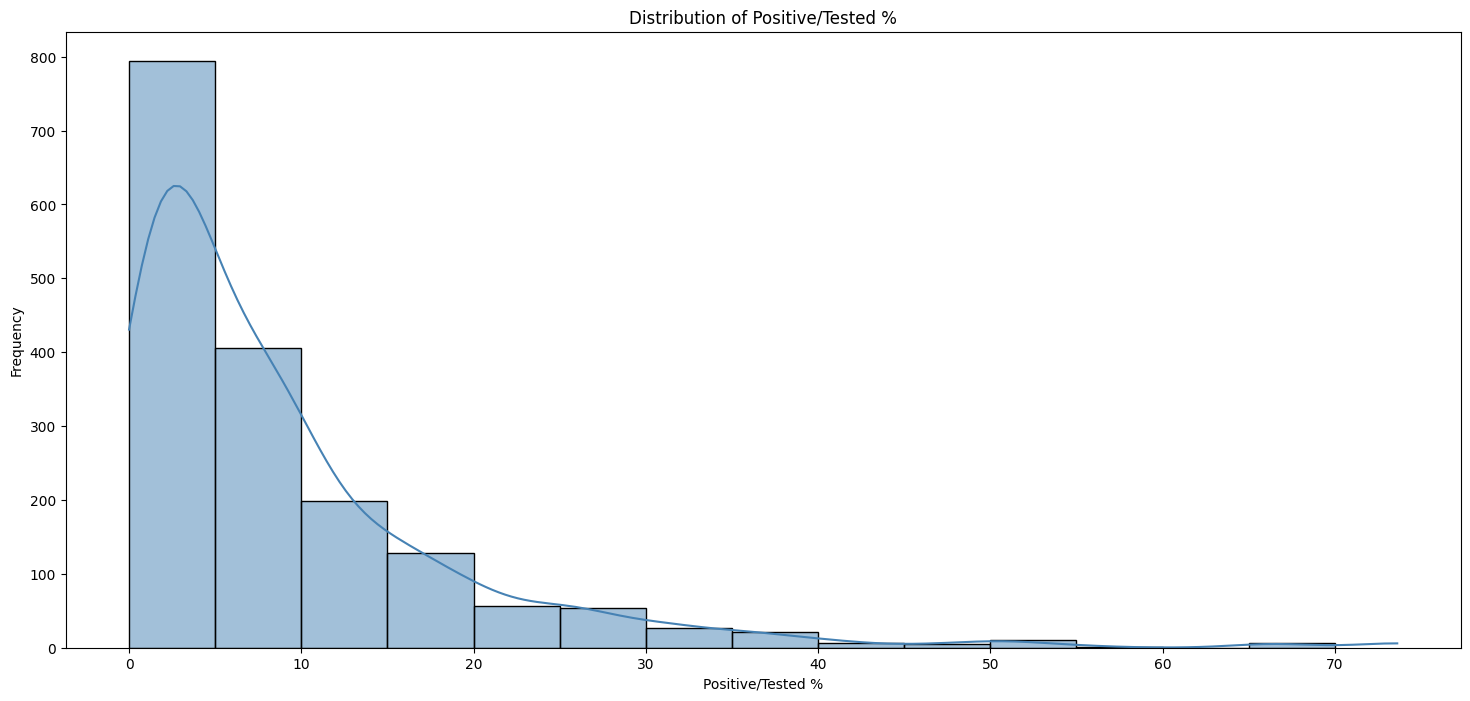

In [33]:
plt.figure(figsize=(18,8))
sns.histplot(df['Positive/Tested %'],bins=np.arange(df['Positive/Tested %'].min(),df['Positive/Tested %'].max(),5),color='steelblue',edgecolor='black',kde=True)
plt.title('Distribution of Positive/Tested %')
plt.xlabel('Positive/Tested %')
plt.ylabel('Frequency')
plt.show()

In [34]:
df.describe()

,Tested,Positive,Positive/Tested %
count,1.721000e+03,1.721000e+03,1721.000000
mean,4.558650e+05,3.246887e+04,9.145426
std,2.724492e+06,1.472534e+05,10.599200
min,1.800000e+01,0.000000e+00,0.000000
25%,1.830300e+04,7.140000e+02,2.200000
50%,6.789500e+04,2.854000e+03,5.830000
75%,2.258890e+05,1.442300e+04,11.780000
max,9.041000e+07,3.292329e+06,73.620000
